<p style="text-align:center">
PSY 381D <b>Brain Connectivity</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Network centrality </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 18, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. Network data
<hr style="height:1px;border:none" />

We will examine these network data for today's exercises. They are available in the **`DataCentrality`** directory.
* Florentine family network (`Padgett.paj`)
* Brain network (resting-state fMRI, ROI)
   * Berlin (`Berlin_sub91116_aal90_d10_annotated.adjlist`)
   * Leiden (`Leiden_sub30943_aal90_d10_annotated.adjlist`)
   * New York (`NewYork_sub78118_aal90_d10_annotated.adjlist`)
   * Oxford (`Oxford_sub16112_aal90_d10_annotated.adjlist`)
   * Queensland (`Queensland_sub42533_aal90_d10_annotated.adjlist`)


# 2. Degree centrality
<hr style="height:1px;border:none" />

The idea behind the degree centrality is that the more connected a node is, the more important that node is. The degree centrality is simply the node degree, divided by $n-1$, where $n$ is the number of all available nodes. The degree centrality for all nodes in a graph can be calculated by the **`degree_centrality`** in **`networkx`**. It returns a dictionary-like object with nodes as keys and degree centralities as values. Here are examples of degree centrality on the Florentine network and brain network (Berlin).


`<DegreeCentral.py>`

In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### loading the network data
# Florentine family network
G_Flo = nx.Graph(nx.read_pajek('DataCentrality/Padgett.paj'))
G_Flo.remove_node('Pucci') # removing isolated node
# Brain (Berlin)
G_Berlin = nx.read_adjlist('DataCentrality/Berlin_sub91116_aal90_d10_annotated.adjlist')
# Brain (Leiden)
G_Leiden = nx.read_adjlist('DataCentrality/Leiden_sub30943_aal90_d10_annotated.adjlist')
# Brain (New York)
G_NY = nx.read_adjlist('DataCentrality/NewYork_sub78118_aal90_d10_annotated.adjlist')
# Brain (Oxford)
G_Oxford = nx.read_adjlist('DataCentrality/Oxford_sub16112_aal90_d10_annotated.adjlist')
# Brain (Queensland)
G_Queen = nx.read_adjlist('DataCentrality/Queensland_sub42533_aal90_d10_annotated.adjlist')

Here are degree centralities.

In [3]:
##### degree centrality
Cdeg_Flo = nx.degree_centrality(G_Flo)
Cdeg_Berlin = nx.degree_centrality(G_Berlin)  

In [4]:
Cdeg_Flo

{'Acciaiuoli': 0.07142857142857142,
 'Albizzi': 0.21428571428571427,
 'Barbadori': 0.14285714285714285,
 'Bischeri': 0.21428571428571427,
 'Castellani': 0.21428571428571427,
 'Ginori': 0.07142857142857142,
 'Guadagni': 0.2857142857142857,
 'Lamberteschi': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Pazzi': 0.07142857142857142,
 'Peruzzi': 0.21428571428571427,
 'Ridolfi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Strozzi': 0.2857142857142857,
 'Tornabuoni': 0.21428571428571427}

In [4]:
Cdeg_Berlin

Now let's examine which nodes have high degree centralities. First, the Florentine family network.

In [5]:
##### sorting nodes by degree centrality
# first, Florentine network
Cdeg_Flo_node = Cdeg_Flo.keys()
Cdeg_Flo_k = Cdeg_Flo.values()
sortedNodes_Flo = sorted(zip(Cdeg_Flo_node, Cdeg_Flo_k), 
                            key=lambda x: x[1], reverse=True)
sCdeg_Flo_node, sCdeg_Flo_k = zip(*sortedNodes_Flo)


###### top nodes and their degree centrality
print('Florentine family network -- Top degree centrality nodes')
print('Node           \tDegree centrality')
for iNode in range(5):
    print('%-14s\t' % str(sCdeg_Flo_node[iNode]), end='')
    print('%6.4f' % sCdeg_Flo_k[iNode])
print()

Florentine family network -- Top degree centrality nodes
Node           	Degree centrality
Medici        	0.4286
Guadagni      	0.2857
Strozzi       	0.2857
Albizzi       	0.2143
Bischeri      	0.2143



Next, the brain network.

In [6]:
##### sorting nodes by degree centrality
# next, brain network (Berlin)
Cdeg_Berlin_node = Cdeg_Berlin.keys()
Cdeg_Berlin_k = Cdeg_Berlin.values()
sortedNodes_Berlin = sorted(zip(Cdeg_Berlin_node, Cdeg_Berlin_k), 
                            key=lambda x: x[1], reverse=True)
sCdeg_Berlin_node, sCdeg_Berlin_k = zip(*sortedNodes_Berlin)


###### top nodes and their degree centrality
print('Brain network (Berlin) -- Top degree centrality nodes')
print('Node           \t\tDegree centrality')
for iNode in range(10):
    print('%-20s\t' % str(sCdeg_Berlin_node[iNode]), end='')
    print('%6.4f' % sCdeg_Berlin_k[iNode])
print()

Brain network (Berlin) -- Top degree centrality nodes
Node           		Degree centrality
Precentral_L        	0.2360
Supp_Motor_Area_L   	0.2360
Rolandic_Oper_R     	0.2247
Postcentral_L       	0.2247
Cingulum_Ant_L      	0.2247
Insula_L            	0.2135
Insula_R            	0.2022
Temporal_Mid_R      	0.2022
Temporal_Pole_Sup_L 	0.2022
Temporal_Pole_Sup_R 	0.2022



We can visually examine degree centralities. First, Florentine family network.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


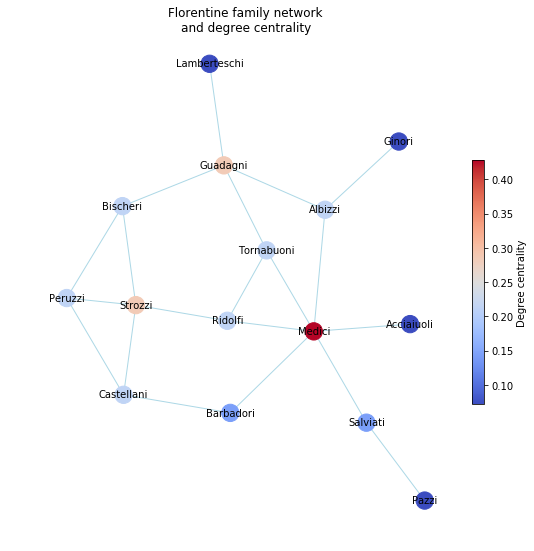

In [7]:
###### drawing the graph (Florentine network) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_Flo, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_Flo, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cdeg_Flo_k))
nx.draw_networkx_edges(G_Flo, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Flo, pos, font_size=10, font_color='black')
plt.axis('off')
plt.title('Florentine family network\nand degree centrality')
vmin = sCdeg_Flo_k[-1]
vmax = sCdeg_Flo_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Degree centrality')
plt.show()


Now the brain network (Berlin) in the brain space.

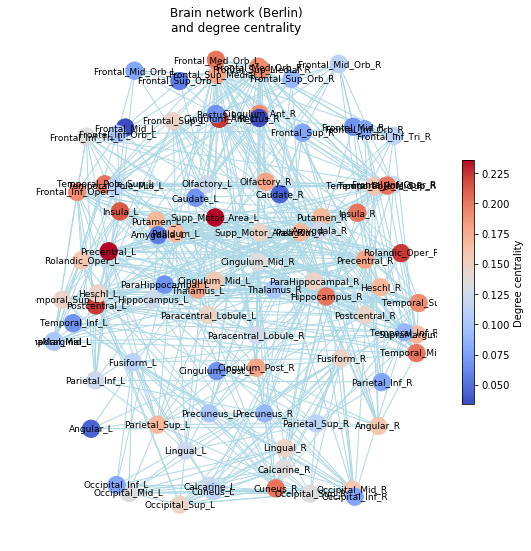

In [8]:
###### drawing the graph (Brain, Berlin) --- their brain space coordinate
# loading the coordinates info for brain areas
AALTable = pd.read_csv('DataCentrality/aal_MNI_V4_coord.csv')
# dictionary of xy-coordinates
pos = {}
for i in range(1,91):
    pos[AALTable.iloc[i-1,1]] = np.array(AALTable.loc[i-1,
                                                      ['centerX',
                                                       'centerY']])


# Actual drawing
plt.figure(figsize=[9,9])
nx.draw_networkx_nodes(G_Berlin, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cdeg_Berlin_k))
nx.draw_networkx_edges(G_Berlin, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Berlin, pos, font_size=9, font_color='black')
plt.axis('off')
plt.title('Brain network (Berlin)\nand degree centrality')
vmin = sCdeg_Berlin_k[-1]
vmax = sCdeg_Berlin_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Degree centrality')
plt.show()

# 3. Eigenvector centrality
<hr style="height:1px;border:none" />

In the degree centrality, we only care the number of connections. We do not care whether nodes are connected to other important nodes. The **eigenvector centrality** takes into an account of information as to whether a node is connected to other important nodes (with high eigenvector centrality). The eigenvector centrality is a variant of the *PageRank centrality* which is used by Google to determine the importance of hits. 

<img style="width: 400px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/NetCent_PageRank.png?raw=true" alt="PageRank centrality"/>

Here, node B has high centrality due to its large number of connections. Node C also has high centrality because it is connected to B (a high centrality node). 

Mathematical formulations for the eigenvector centrality is beyond the scope of this class. You can calculate eigenvector centrality with the **`eigenvector_centrality`** function in **`networkx`**. Its use is very similar to that of `degree_centrality`. Here are examples of eigenvector centralities.

`<EigenCentral.py>`

In [10]:
##### eigenvector centrality
Ceig_Flo = nx.eigenvector_centrality(G_Flo)
Ceig_Berlin = nx.eigenvector_centrality(G_Berlin)  

And here are the important nodes, defined by eigenvector centralities.

In [11]:
##### sorting nodes by eigenvector centrality
# first, Florentine network
Ceig_Flo_node = Ceig_Flo.keys()
Ceig_Flo_k = Ceig_Flo.values()
sortedNodes_Flo = sorted(zip(Ceig_Flo_node, Ceig_Flo_k), 
                            key=lambda x: x[1], reverse=True)
sCeig_Flo_node, sCeig_Flo_k = zip(*sortedNodes_Flo)

# next, brain network (Berlin)
Ceig_Berlin_node = Ceig_Berlin.keys()
Ceig_Berlin_k = Ceig_Berlin.values()
sortedNodes_Berlin = sorted(zip(Ceig_Berlin_node, Ceig_Berlin_k), 
                            key=lambda x: x[1], reverse=True)
sCeig_Berlin_node, sCeig_Berlin_k = zip(*sortedNodes_Berlin)



###### top nodes and their eigenvector centrality
print('Florentine family network -- Top eigenvector centrality nodes')
print('Node           \tEigenvector centrality')
for iNode in range(5):
    print('%-14s\t' % str(sCeig_Flo_node[iNode]), end='')
    print('%6.4f' % sCeig_Flo_k[iNode])
print()

print('Brain network (Berlin) -- Top eigenvector centrality nodes')
print('Node           \t\tEigenvector centrality')
for iNode in range(10):
    print('%-20s\t' % str(sCeig_Berlin_node[iNode]), end='')
    print('%6.4f' % sCeig_Berlin_k[iNode])
print()

Florentine family network -- Top eigenvector centrality nodes
Node           	Eigenvector centrality
Medici        	0.4303
Strozzi       	0.3560
Ridolfi       	0.3416
Tornabuoni    	0.3258
Guadagni      	0.2891

Brain network (Berlin) -- Top eigenvector centrality nodes
Node           		Eigenvector centrality
Supp_Motor_Area_L   	0.2186
Rolandic_Oper_R     	0.2129
Precentral_L        	0.2100
Postcentral_L       	0.2070
Insula_L            	0.1842
Precentral_R        	0.1734
Frontal_Inf_Oper_L  	0.1721
Temporal_Sup_R      	0.1689
Putamen_R           	0.1676
Insula_R            	0.1629



Here are all eigenvector centralities from the Florentine family network.

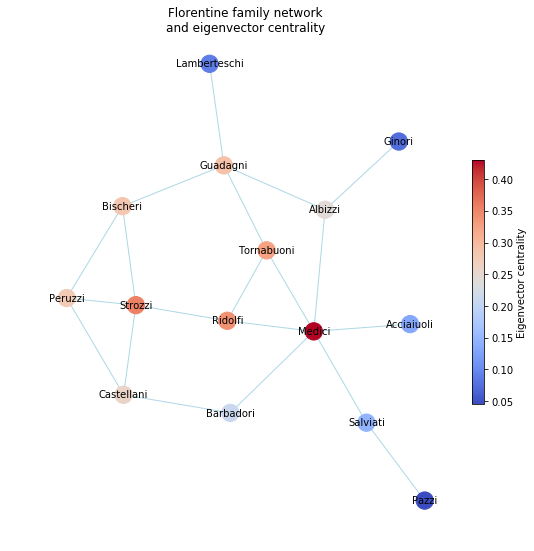

In [12]:
###### drawing the graph (Florentine network) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_Flo, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_Flo, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Ceig_Flo_k))
nx.draw_networkx_edges(G_Flo, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Flo, pos, font_size=10, font_color='black')
plt.axis('off')
plt.title('Florentine family network\nand eigenvector centrality')
vmin = sCeig_Flo_k[-1]
vmax = sCeig_Flo_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Eigenvector centrality')
plt.show()

One thing to note here is that the **Tornabuoni** family and **Ridolfi** family have high eigenvector centrality because they are connected to the **Medici**, **Strozzi**, and **Guadagni** families (which are well connected, as you can see).

Here are all eigenvector centralities from the brain network (Berlin).

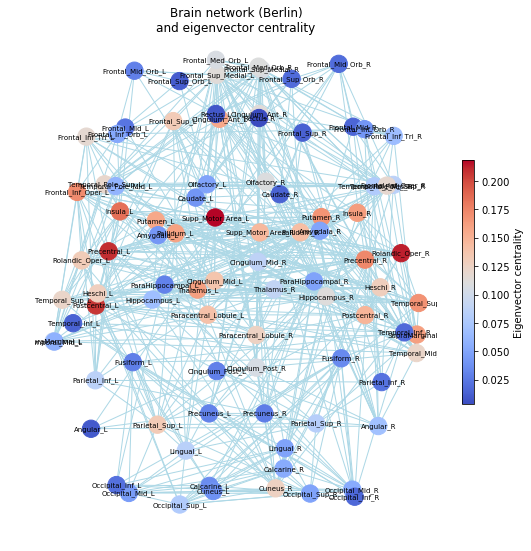

In [13]:
###### drawing the graph (Brain, Berlin) --- their brain space coordinate
# loading the coordinates info for brain areas
AALTable = pd.read_csv('DataCentrality/aal_MNI_V4_coord.csv')
# dictionary of xy-coordinates
pos = {}
for i in range(1,91):
    pos[AALTable.iloc[i-1,1]] = np.array(AALTable.loc[i-1,
                                                      ['centerX',
                                                       'centerY']])


# Actual drawing
plt.figure(figsize=[9,9])
nx.draw_networkx_nodes(G_Berlin, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Ceig_Berlin_k))
nx.draw_networkx_edges(G_Berlin, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Berlin, pos, font_size=7, font_color='black')
plt.axis('off')
plt.title('Brain network (Berlin)\nand eigenvector centrality')
vmin = sCeig_Berlin_k[-1]
vmax = sCeig_Berlin_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Eigenvector centrality')
plt.show()

### Exercise
1. **High eigenvector centrality in the brain**. Generate lists of top 10 highest eigenvector centrality nodes for four other brain networks (Leiden, New York, Oxford, and Queensland). Are there any nodes that are common in these networks?

Just for fun, let's calculate the average eigenvector centrality (across 5 sites) for each node.

`<AverageEigen.py>`

In [15]:
##### eigenvector centrality
Ceig_Berlin = nx.eigenvector_centrality(G_Berlin)  
Ceig_Leiden = nx.eigenvector_centrality(G_Leiden)  
Ceig_NY = nx.eigenvector_centrality(G_NY)  
Ceig_Oxford = nx.eigenvector_centrality(G_Oxford)  
Ceig_Queen = nx.eigenvector_centrality(G_Queen)  

##### averaging eigenvector centralities
Ceig_Avg = Ceig_Berlin.copy()
listCeig = [Ceig_Berlin, Ceig_Leiden, Ceig_NY, Ceig_Oxford, Ceig_Queen]
for iNode in Ceig_Avg.keys():
    sumCeig = 0
    for iNet in listCeig:
        sumCeig += iNet[iNode]
    Ceig_Avg[iNode] = sumCeig/5

And here are the top average eigenvector nodes.

In [16]:
##### sorting nodes by eigenvector centrality
Ceig_Avg_node = Ceig_Avg.keys()
Ceig_Avg_k = Ceig_Avg.values()
sortedNodes_Avg = sorted(zip(Ceig_Avg_node, Ceig_Avg_k), 
                            key=lambda x: x[1], reverse=True)
sCeig_Avg_node, sCeig_Avg_k = zip(*sortedNodes_Avg)


###### top nodes and their eigenvector centrality
print('Brain network (average) -- Top eigenvector centrality nodes')
print('Node           \t\tEigenvector centrality')
for iNode in range(10):
    print('%-20s\t' % str(sCeig_Avg_node[iNode]), end='')
    print('%6.4f' % sCeig_Avg_k[iNode])
print()

Brain network (average) -- Top eigenvector centrality nodes
Node           		Eigenvector centrality
Frontal_Inf_Oper_L  	0.1764
Frontal_Inf_Tri_L   	0.1655
Supp_Motor_Area_L   	0.1501
Precentral_R        	0.1493
Temporal_Sup_R      	0.1475
Frontal_Inf_Oper_R  	0.1453
Frontal_Inf_Tri_R   	0.1433
Rolandic_Oper_R     	0.1402
Insula_L            	0.1387
Rolandic_Oper_L     	0.1370



And the visualization of all average eigenvector centralities (at their proper location in the brain).

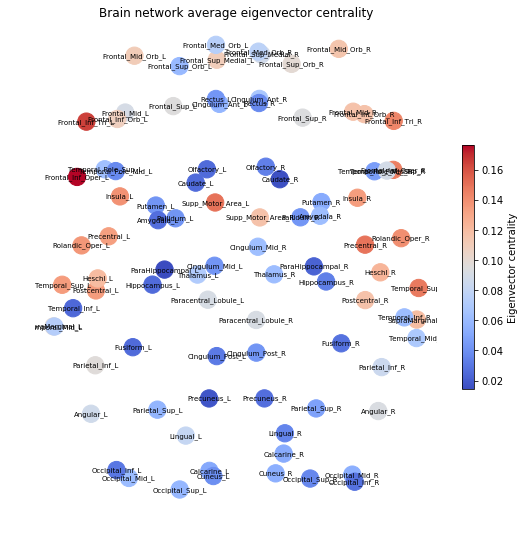

In [18]:
###### drawing the nodes (Brain, average) --- their brain space coordinate
# Actual drawing
plt.figure(figsize=[9,9])
nx.draw_networkx_nodes(G_Berlin, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Ceig_Avg_k))
nx.draw_networkx_labels(G_Berlin, pos, font_size=7, font_color='black')
plt.axis('off')
plt.title('Brain network average eigenvector centrality')
vmin = sCeig_Avg_k[-1]
vmax = sCeig_Avg_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Eigenvector centrality')
plt.show()

# 4. Betweenness centrality
<hr style="height:1px;border:none" />

The **betweenness centrality** is determined by counting how many shortest paths, between any pairs of nodes, goes through a particular node. This centrality is pertinent in a network describing transfers of tangible objects without replication. This may not be applicable to brain networks, but you see betweenness centrality in the brain network literature very often.  We can use **`betweenness_centrality`** function to determine betweenness centralities of nodes in a network. Here are examples.

`<BetweenCentral.py>`

In [19]:
##### betweenness centrality
Cbet_Flo = nx.betweenness_centrality(G_Flo)
Cbet_Berlin = nx.betweenness_centrality(G_Berlin)  

And here are the important nodes, in terms of betweenness centrality.

In [20]:
##### sorting nodes by betweenness centrality
# first, Florentine network
Cbet_Flo_node = Cbet_Flo.keys()
Cbet_Flo_k = Cbet_Flo.values()
sortedNodes_Flo = sorted(zip(Cbet_Flo_node, Cbet_Flo_k), 
                            key=lambda x: x[1], reverse=True)
sCbet_Flo_node, sCbet_Flo_k = zip(*sortedNodes_Flo)

# next, brain network (Berlin)
Cbet_Berlin_node = Cbet_Berlin.keys()
Cbet_Berlin_k = Cbet_Berlin.values()
sortedNodes_Berlin = sorted(zip(Cbet_Berlin_node, Cbet_Berlin_k), 
                            key=lambda x: x[1], reverse=True)
sCbet_Berlin_node, sCbet_Berlin_k = zip(*sortedNodes_Berlin)



###### top nodes and their betweenness centrality
print('Florentine family network -- Top betweenness centrality nodes')
print('Node           \tBetweenness centrality')
for iNode in range(5):
    print('%-14s\t' % str(sCbet_Flo_node[iNode]), end='')
    print('%6.4f' % sCbet_Flo_k[iNode])
print()

print('Brain network (Berlin) -- Top betweenness centrality nodes')
print('Node           \t\tBetweenness centrality')
for iNode in range(10):
    print('%-20s\t' % str(sCbet_Berlin_node[iNode]), end='')
    print('%6.4f' % sCbet_Berlin_k[iNode])
print()

Florentine family network -- Top betweenness centrality nodes
Node           	Betweenness centrality
Medici        	0.5220
Guadagni      	0.2546
Albizzi       	0.2125
Salviati      	0.1429
Ridolfi       	0.1136

Brain network (Berlin) -- Top betweenness centrality nodes
Node           		Betweenness centrality
Frontal_Sup_Medial_L	0.0705
Frontal_Med_Orb_L   	0.0456
Cingulum_Ant_L      	0.0436
Frontal_Mid_Orb_R   	0.0427
Cuneus_R            	0.0425
Parietal_Sup_L      	0.0405
Frontal_Sup_L       	0.0378
Insula_R            	0.0375
Insula_L            	0.0374
Pallidum_R          	0.0337



Let's examine betweenness centralities in the Florentine family network.

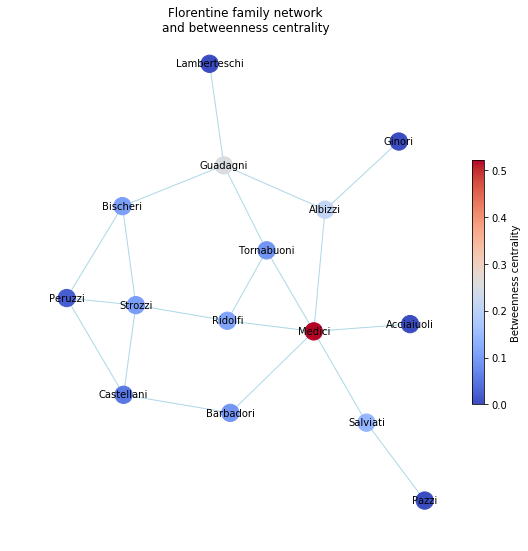

In [21]:
###### drawing the graph (Florentine network) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_Flo, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_Flo, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cbet_Flo_k))
nx.draw_networkx_edges(G_Flo, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Flo, pos, font_size=10, font_color='black')
plt.axis('off')
plt.title('Florentine family network\nand betweenness centrality')
vmin = sCbet_Flo_k[-1]
vmax = sCbet_Flo_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Betweenness centrality')
plt.show()

Here you notice that the **Medici** family is located in the center of the network.

Here are the betweenness centralities of the brain network (Berlin).

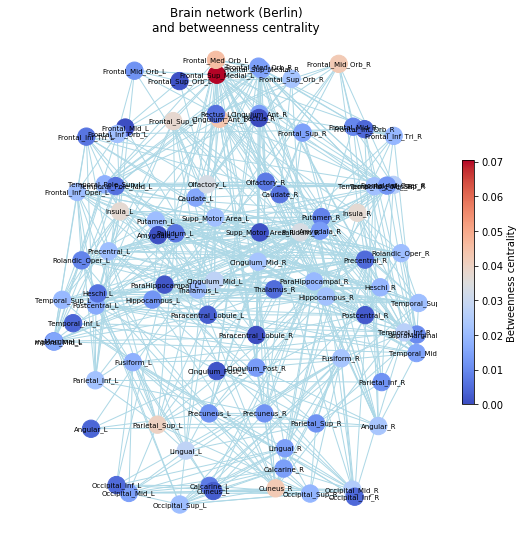

In [22]:
###### drawing the graph (Brain, Berlin) --- their brain space coordinate
# loading the coordinates info for brain areas
AALTable = pd.read_csv('DataCentrality/aal_MNI_V4_coord.csv')
# dictionary of xy-coordinates
pos = {}
for i in range(1,91):
    pos[AALTable.iloc[i-1,1]] = np.array(AALTable.loc[i-1,
                                                      ['centerX',
                                                       'centerY']])


# Actual drawing
plt.figure(figsize=[9,9])
nx.draw_networkx_nodes(G_Berlin, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cbet_Berlin_k))
nx.draw_networkx_edges(G_Berlin, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Berlin, pos, font_size=7, font_color='black')
plt.axis('off')
plt.title('Brain network (Berlin)\nand betweenness centrality')
vmin = sCbet_Berlin_k[-1]
vmax = sCbet_Berlin_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Betweenness centrality')
plt.show()

Notice that high betweenness centrality nodes are very different from high degree or eigenvector centrality nodes.

### Exercise
1. **Bypassing the Medicis**. In the Florentine family network described above, the Medici family seems to dominate the traffic. So, the Tornabuonis attempt to form alliances with other families to bypass the Medicis. In particular, they decide to add the following edges:
  * (Strozzi, Tornabuoni)
  * (Tornabuoni, Albizzi)
  * (Tornabuoni, Salviati)
  * (Tornabuoni, Acciaiuoli)

After adding these edges, re-generate the list of top 5 betweenness centrality nodes. 

# 5. Closeness centrality
<hr style="height:1px;border:none" />

Betweenness centrality may not be appropriate in determining influential nodes in a spread of a rumor or an epidemic, in a parallel duplication fashion. In such cases, **closeness centrality** may be more appropriate. The closeness centrality is the inverse of the shortest path length from a node to all the other nodes in a network. The closeness centrality can be calculated by **`closeness_centrality`** function. Here are some examples.

`<CloseCentral.py>`

In [23]:
##### closeness centrality
Cclo_Flo = nx.closeness_centrality(G_Flo)
Cclo_Berlin = nx.closeness_centrality(G_Berlin)  

And here are the important nodes, in terms of the closeness centrality.

In [24]:
##### sorting nodes by closeness centrality
# first, Florentine network
Cclo_Flo_node = Cclo_Flo.keys()
Cclo_Flo_k = Cclo_Flo.values()
sortedNodes_Flo = sorted(zip(Cclo_Flo_node, Cclo_Flo_k), 
                            key=lambda x: x[1], reverse=True)
sCclo_Flo_node, sCclo_Flo_k = zip(*sortedNodes_Flo)

# next, brain network (Berlin)
Cclo_Berlin_node = Cclo_Berlin.keys()
Cclo_Berlin_k = Cclo_Berlin.values()
sortedNodes_Berlin = sorted(zip(Cclo_Berlin_node, Cclo_Berlin_k), 
                            key=lambda x: x[1], reverse=True)
sCclo_Berlin_node, sCclo_Berlin_k = zip(*sortedNodes_Berlin)



###### top nodes and their closeness centrality
print('Florentine family network -- Top closeness centrality nodes')
print('Node           \tCloseness centrality')
for iNode in range(5):
    print('%-14s\t' % str(sCclo_Flo_node[iNode]), end='')
    print('%6.4f' % sCclo_Flo_k[iNode])
print()

print('Brain network (Berlin) -- Top closeness centrality nodes')
print('Node           \t\tCloseness centrality')
for iNode in range(10):
    print('%-20s\t' % str(sCclo_Berlin_node[iNode]), end='')
    print('%6.4f' % sCclo_Berlin_k[iNode])
print()

Florentine family network -- Top closeness centrality nodes
Node           	Closeness centrality
Medici        	0.5600
Ridolfi       	0.5000
Albizzi       	0.4828
Tornabuoni    	0.4828
Guadagni      	0.4667

Brain network (Berlin) -- Top closeness centrality nodes
Node           		Closeness centrality
Frontal_Sup_Medial_L	0.4734
Cingulum_Ant_L      	0.4734
Insula_R            	0.4684
Temporal_Sup_R      	0.4564
Cuneus_R            	0.4541
Thalamus_L          	0.4518
Insula_L            	0.4495
Frontal_Med_Orb_L   	0.4472
Temporal_Sup_L      	0.4450
Cingulum_Ant_R      	0.4450



And here are closeness centralities in the Florentine family network.

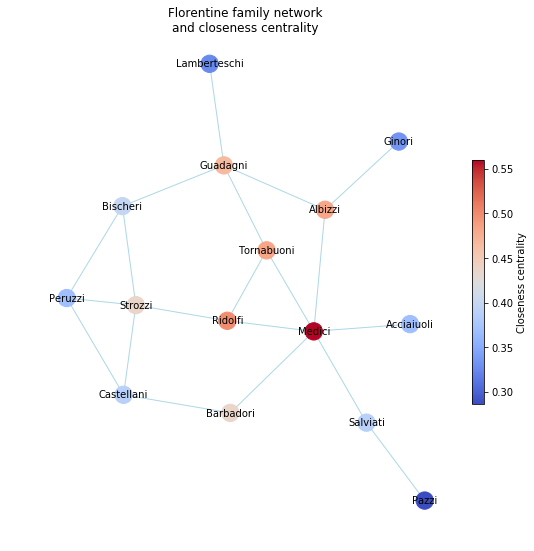

In [25]:
###### drawing the graph (Florentine network) --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G_Flo, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_Flo, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cclo_Flo_k))
nx.draw_networkx_edges(G_Flo, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Flo, pos, font_size=10, font_color='black')
plt.axis('off')
plt.title('Florentine family network\nand closeness centrality')
vmin = sCclo_Flo_k[-1]
vmax = sCclo_Flo_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Closeness centrality')
plt.show()

And here are closeness centralities in the brain network (Berlin).

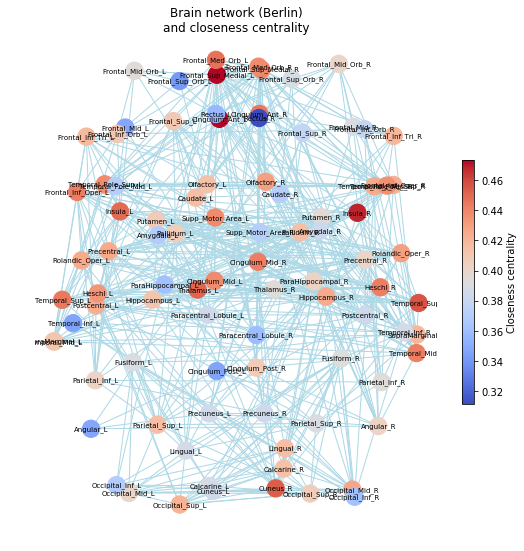

In [26]:
###### drawing the graph (Brain, Berlin) --- their brain space coordinate
# loading the coordinates info for brain areas
AALTable = pd.read_csv('DataCentrality/aal_MNI_V4_coord.csv')
# dictionary of xy-coordinates
pos = {}
for i in range(1,91):
    pos[AALTable.iloc[i-1,1]] = np.array(AALTable.loc[i-1,
                                                      ['centerX',
                                                       'centerY']])


# Actual drawing
plt.figure(figsize=[9,9])
nx.draw_networkx_nodes(G_Berlin, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cclo_Berlin_k))
nx.draw_networkx_edges(G_Berlin, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_Berlin, pos, font_size=7, font_color='black')
plt.axis('off')
plt.title('Brain network (Berlin)\nand closeness centrality')
vmin = sCclo_Berlin_k[-1]
vmax = sCclo_Berlin_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Closeness centrality')
plt.show()

Just for fun, let's calculate the average closeness across 5 sites in the brain networks.

`<AverageClose.py>`

In [27]:
##### closeness centrality
Cclo_Berlin = nx.closeness_centrality(G_Berlin)  
Cclo_Leiden = nx.closeness_centrality(G_Leiden)  
Cclo_NY = nx.closeness_centrality(G_NY)  
Cclo_Oxford = nx.closeness_centrality(G_Oxford)  
Cclo_Queen = nx.closeness_centrality(G_Queen)  


##### averaging closeness centralities
Cclo_Avg = Cclo_Berlin.copy()
listCclo = [Cclo_Berlin, Cclo_Leiden, Cclo_NY, Cclo_Oxford, Cclo_Queen]
for iNode in Cclo_Avg.keys():
    sumCclo = 0
    for iNet in listCclo:
        sumCclo += iNet[iNode]
    Cclo_Avg[iNode] = sumCclo/5

High average closeness nodes are:

In [28]:
##### sorting nodes by closeness centrality
Cclo_Avg_node = Cclo_Avg.keys()
Cclo_Avg_k = Cclo_Avg.values()
sortedNodes_Avg = sorted(zip(Cclo_Avg_node, Cclo_Avg_k), 
                            key=lambda x: x[1], reverse=True)
sCclo_Avg_node, sCclo_Avg_k = zip(*sortedNodes_Avg)


###### top nodes and their closeness centrality
print('Brain network (average) -- Top closeness centrality nodes')
print('Node           \t\tCloseness centrality')
for iNode in range(10):
    print('%-20s\t' % str(sCclo_Avg_node[iNode]), end='')
    print('%6.4f' % sCclo_Avg_k[iNode])
print()

Brain network (average) -- Top closeness centrality nodes
Node           		Closeness centrality
Insula_R            	0.4448
Frontal_Inf_Oper_L  	0.4442
Insula_L            	0.4414
Frontal_Inf_Tri_L   	0.4402
Temporal_Sup_R      	0.4402
SupraMarginal_R     	0.4387
Temporal_Sup_L      	0.4383
Supp_Motor_Area_L   	0.4358
Frontal_Inf_Oper_R  	0.4309
Temporal_Pole_Sup_R 	0.4291



And we can see all average closeness centralities in the brain space.

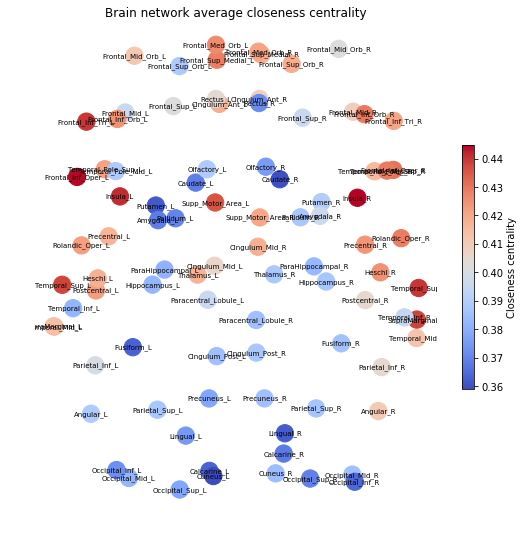

In [29]:
###### drawing the nodes (Brain, average) --- their brain space coordinate
# loading the coordinates info for brain areas
AALTable = pd.read_csv('DataCentrality/aal_MNI_V4_coord.csv')
# dictionary of xy-coordinates
pos = {}
for i in range(1,91):
    pos[AALTable.iloc[i-1,1]] = np.array(AALTable.loc[i-1,
                                                      ['centerX',
                                                       'centerY']])


# Actual drawing
plt.figure(figsize=[9,9])
nx.draw_networkx_nodes(G_Berlin, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cclo_Avg_k))
nx.draw_networkx_labels(G_Berlin, pos, font_size=7, font_color='black')
plt.axis('off')
plt.title('Brain network average closeness centrality')
vmin = sCclo_Avg_k[-1]
vmax = sCclo_Avg_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Closeness centrality')
plt.show()

You can see the difference between eigenvector and closeness centralities by comparing with the previous results.

# *Further readings*
<hr style="height:1px;border:none" />

* Joyce KE, Laurienti PJ, Burdette JH, Hayasaka S. 2010. *A new measure of centrality for brain networks.* PloS one, 5:e12200
* Zuo X-N, Ehmke R, Mennes M, Imperati D, Castellanos FX, Sporns O, Milham MP. 2012. *Network Centrality in the Human Functional Connectome*. Cerebral Cortex 22:1862–1875
